## train on train data and test on dev data

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('./datas/train_ver2', index_col=[0])
train.tail()

,comments,bias_label,gender_label,hate_label,news_title,comment_pos,title_pos
7891,힘내세요 응원합니다,none,False,none,허지웅 허투루 넘길 말 없었다솔직하게 드러냈던 속사정,"[('힘내세요', 'Verb'), ('응원', 'Noun'), ('합니다', 'Ve...","[('허지웅', 'Noun'), ('허투루', 'Noun'), ('넘길', 'Ver..."
7892,힘내세요삼가 고인의 명복을 빕니다,none,False,none,이혜경 오 캐롤’ 공연 중 남편 오정욱 부고오열 속 발인 종합,"[('힘내세요', 'Verb'), ('삼가', 'Verb'), ('고인', 'Nou...","[('이혜경', 'Noun'), ('오', 'Noun'), ('캐롤', 'Noun'..."
7893,힘내세용 항상 응원합니닷,none,False,none,설경구♥ 송윤아 아들과 즐거운 하루 전 엄마니까요,"[('힘내세용', 'Verb'), ('항상', 'Noun'), ('응원', 'Nou...","[('설경구', 'Noun'), ('♥', 'Foreign'), ('송윤아', 'N..."
7894,힘내소연기로 답해요나도 53살 인데 이런일 저런일 다 있더라구요인격을 믿습니다홨팅,none,False,none,현장연예인 인생 협박 유감미소잃은 최민수 보복운전 혐의 2차 공판종합,"[('힘내소', 'Verb'), ('연기', 'Noun'), ('로', 'Josa'...","[('현장', 'Noun'), ('연예인', 'Noun'), ('인생', 'Noun..."
7895,힘들면 관뒀어야지 그게 현명한거다,none,False,none,단독스태프 사망사고 서른이지만 결국 오늘 촬영 취소,"[('힘들면', 'Adjective'), ('관', 'Noun'), ('뒀어야지',...","[('단독', 'Noun'), ('스태프', 'Noun'), ('사망', 'Noun..."


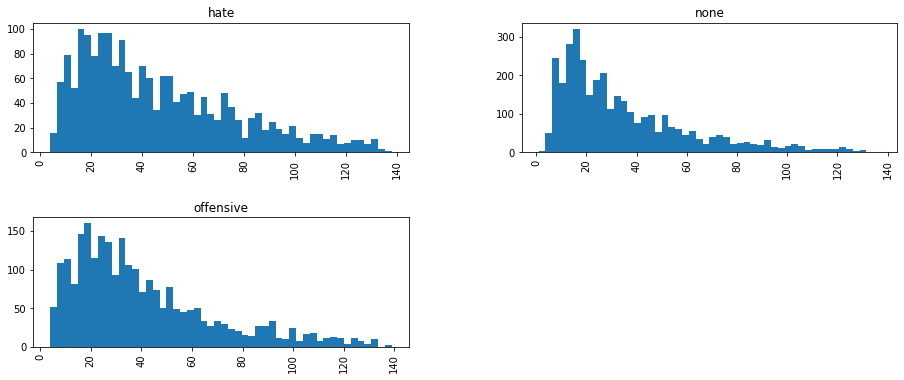

In [19]:
train['length'] = train['comments'].apply(len)
train.hist(column='length', by='hate_label', bins=50, figsize=(15,6));

In [20]:
import pandas as pd
from konlpy.tag import Okt; t = Okt()
from sklearn.feature_extraction.text import TfidfVectorizer

def t_tokenizer(text):
    tokens_ko = t.morphs(text)
    return tokens_ko

In [21]:
tfidf_vect = TfidfVectorizer(tokenizer=t_tokenizer, sublinear_tf=True, ngram_range=(1,3), min_df=3, max_df=0.9)
tfidf_train = tfidf_vect.fit_transform(train['comments'])

In [22]:
print(tfidf_train[0])

  (0, 2262)	0.2409672905771141
  (0, 9616)	0.2450429747525062
  (0, 1115)	0.1784670114013033
  (0, 1319)	0.1950594008732794
  (0, 2261)	0.2179604474189606
  (0, 5227)	0.23124735276320987
  (0, 3726)	0.2553128786552685
  (0, 3734)	0.23124735276320987
  (0, 1927)	0.19680400667869513
  (0, 6535)	0.08909229306256912
  (0, 10148)	0.22178071343321842
  (0, 3512)	0.23124735276320987
  (0, 1908)	0.1499146082192099
  (0, 158)	0.2373722823538103
  (0, 5838)	0.12924497671592003
  (0, 5723)	0.24974800683559492
  (0, 9120)	0.2553128786552685
  (0, 10667)	0.4079930886478098
  (0, 10631)	0.23124735276320987


In [23]:
dev = pd.read_csv('./datas/dev.hate.csv')
dev.rename(columns={'label': 'hate_label'}, inplace=True)
dev.tail(10)

,comments,hate_label
461,송윤아 이뿌다 옷도 다 이쁘고 고급지고 우아하다,none
462,니기미 나는 흔한공황장애 장애가 없어서 벌금이빠이,hate
463,강용석도 찌질하네 과거들추기는 추하다,offensive
464,지겹이 이프로 그만하자 작가야,offensive
465,그래도 좋은 노래 많았는데ㅠ,none
466,지현우 범죄 저지르지 않았나요?,offensive
467,여자인생 망칠 일 있나 ㅋㅋ,hate
468,근데 전라도에서 사고가 났는데 굳이 서울까지 와서 병원에 가느 이유는?,offensive
469,"할매젖x, 뱃살x, 몸매 s라인, 유륜은 적당해야됨(너무크거나 너무 작아도 x), ...",hate
470,남자가 잘못한거라면... 반성도 없다면...나였다면 ... 여자처럼 아주 못되게 할...,none


In [24]:
tfidf_dev = tfidf_vect.transform(dev['comments'])
print(tfidf_dev[0])

  (0, 10740)	0.42355568980977504
  (0, 9567)	0.46772098550310237
  (0, 9566)	0.39949236874813293
  (0, 7345)	0.16015963401424047
  (0, 5441)	0.3828605173483004
  (0, 4650)	0.37487612404555287
  (0, 4182)	0.3598306715256187


In [25]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim = cosine_similarity(tfidf_dev, tfidf_train)
len(cos_sim), len(cos_sim[0])

(471, 7896)

In [26]:
highest = []
item_idx = []
for each in cos_sim:
    highest.append(max(each))
    item_idx.append(np.where(each==max(each)))

In [27]:
len(item_idx)

471

In [28]:
item = []
for each in item_idx:
    item.append((each[0][0]))

In [29]:
train_label = []
for each in item:
    train_label.append(train['hate_label'][each])

In [30]:
dev['highest'] = highest
dev['highest_id'] = item
dev['train_label'] = train_label
dev.tail(10)

,comments,hate_label,highest,highest_id,train_label
461,송윤아 이뿌다 옷도 다 이쁘고 고급지고 우아하다,none,0.236438,4429,none
462,니기미 나는 흔한공황장애 장애가 없어서 벌금이빠이,hate,0.547884,2071,none
463,강용석도 찌질하네 과거들추기는 추하다,offensive,0.436325,1830,hate
464,지겹이 이프로 그만하자 작가야,offensive,0.326743,7790,none
465,그래도 좋은 노래 많았는데ㅠ,none,0.511568,840,none
466,지현우 범죄 저지르지 않았나요?,offensive,0.720521,2999,none
467,여자인생 망칠 일 있나 ㅋㅋ,hate,0.357772,4054,hate
468,근데 전라도에서 사고가 났는데 굳이 서울까지 와서 병원에 가느 이유는?,offensive,0.324095,1766,none
469,"할매젖x, 뱃살x, 몸매 s라인, 유륜은 적당해야됨(너무크거나 너무 작아도 x), ...",hate,0.356525,6786,none
470,남자가 잘못한거라면... 반성도 없다면...나였다면 ... 여자처럼 아주 못되게 할...,none,0.333702,5236,none


In [31]:
from sklearn.metrics import accuracy_score, f1_score

f1_score(dev['hate_label'], dev['train_label'], average='macro'), accuracy_score(dev['hate_label'], dev['train_label'])

(0.45523200641110845, 0.4692144373673036)

In [15]:
correct = dev[dev['hate_label'] == dev['train_label']]

In [16]:
dev['hate_label'].value_counts()

offensive    189
none         160
hate         122
Name: hate_label, dtype: int64

In [17]:
correct['hate_label'].value_counts()

none         111
offensive     78
hate          41
Name: hate_label, dtype: int64

## append train and dev the train_test_split for bigger data set

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('./datas/train_ver2', index_col=[0])
train.tail()

,comments,bias_label,gender_label,hate_label,news_title,comment_pos,title_pos
7891,힘내세요 응원합니다,none,False,none,허지웅 허투루 넘길 말 없었다솔직하게 드러냈던 속사정,"[('힘내세요', 'Verb'), ('응원', 'Noun'), ('합니다', 'Ve...","[('허지웅', 'Noun'), ('허투루', 'Noun'), ('넘길', 'Ver..."
7892,힘내세요삼가 고인의 명복을 빕니다,none,False,none,이혜경 오 캐롤’ 공연 중 남편 오정욱 부고오열 속 발인 종합,"[('힘내세요', 'Verb'), ('삼가', 'Verb'), ('고인', 'Nou...","[('이혜경', 'Noun'), ('오', 'Noun'), ('캐롤', 'Noun'..."
7893,힘내세용 항상 응원합니닷,none,False,none,설경구♥ 송윤아 아들과 즐거운 하루 전 엄마니까요,"[('힘내세용', 'Verb'), ('항상', 'Noun'), ('응원', 'Nou...","[('설경구', 'Noun'), ('♥', 'Foreign'), ('송윤아', 'N..."
7894,힘내소연기로 답해요나도 53살 인데 이런일 저런일 다 있더라구요인격을 믿습니다홨팅,none,False,none,현장연예인 인생 협박 유감미소잃은 최민수 보복운전 혐의 2차 공판종합,"[('힘내소', 'Verb'), ('연기', 'Noun'), ('로', 'Josa'...","[('현장', 'Noun'), ('연예인', 'Noun'), ('인생', 'Noun..."
7895,힘들면 관뒀어야지 그게 현명한거다,none,False,none,단독스태프 사망사고 서른이지만 결국 오늘 촬영 취소,"[('힘들면', 'Adjective'), ('관', 'Noun'), ('뒀어야지',...","[('단독', 'Noun'), ('스태프', 'Noun'), ('사망', 'Noun..."


In [86]:
dev = pd.read_csv('./datas/dev.hate.csv')
dev.rename(columns={'label': 'hate_label'}, inplace=True)
dev.tail(10)

,comments,hate_label
461,송윤아 이뿌다 옷도 다 이쁘고 고급지고 우아하다,none
462,니기미 나는 흔한공황장애 장애가 없어서 벌금이빠이,hate
463,강용석도 찌질하네 과거들추기는 추하다,offensive
464,지겹이 이프로 그만하자 작가야,offensive
465,그래도 좋은 노래 많았는데ㅠ,none
466,지현우 범죄 저지르지 않았나요?,offensive
467,여자인생 망칠 일 있나 ㅋㅋ,hate
468,근데 전라도에서 사고가 났는데 굳이 서울까지 와서 병원에 가느 이유는?,offensive
469,"할매젖x, 뱃살x, 몸매 s라인, 유륜은 적당해야됨(너무크거나 너무 작아도 x), ...",hate
470,남자가 잘못한거라면... 반성도 없다면...나였다면 ... 여자처럼 아주 못되게 할...,none


In [87]:
train.drop(columns=(['bias_label', 'gender_label', 'news_title', 'comment_pos', 'title_pos']), inplace=True)
train = train.append(dev, ignore_index=True)
train.tail()

,comments,hate_label
8362,지현우 범죄 저지르지 않았나요?,offensive
8363,여자인생 망칠 일 있나 ㅋㅋ,hate
8364,근데 전라도에서 사고가 났는데 굳이 서울까지 와서 병원에 가느 이유는?,offensive
8365,"할매젖x, 뱃살x, 몸매 s라인, 유륜은 적당해야됨(너무크거나 너무 작아도 x), ...",hate
8366,남자가 잘못한거라면... 반성도 없다면...나였다면 ... 여자처럼 아주 못되게 할...,none


In [88]:
train = train.drop_duplicates()
train.tail()

,comments,hate_label
8362,지현우 범죄 저지르지 않았나요?,offensive
8363,여자인생 망칠 일 있나 ㅋㅋ,hate
8364,근데 전라도에서 사고가 났는데 굳이 서울까지 와서 병원에 가느 이유는?,offensive
8365,"할매젖x, 뱃살x, 몸매 s라인, 유륜은 적당해야됨(너무크거나 너무 작아도 x), ...",hate
8366,남자가 잘못한거라면... 반성도 없다면...나였다면 ... 여자처럼 아주 못되게 할...,none


In [89]:
import pandas as pd
from konlpy.tag import Okt; t = Okt()
from sklearn.feature_extraction.text import TfidfVectorizer

def t_tokenizer(text):
    tokens_ko = t.morphs(text)
    return tokens_ko

In [93]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, class_train, class_test = train_test_split(train['comments'], train['hate_label'], test_size=0.2, random_state=113)

In [94]:
tfidf_vect = TfidfVectorizer(tokenizer=t_tokenizer, sublinear_tf=True, ngram_range=(1,3), min_df=3, max_df=0.9)
tfidf_train = tfidf_vect.fit_transform(msg_train)
tfidf_test = tfidf_vect.transform(msg_test)

In [95]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim = cosine_similarity(tfidf_test, tfidf_train)

highest = []
item_idx = []
for each in cos_sim:
    highest.append(max(each))
    item_idx.append(np.where(each==max(each)))

item = []
for each in item_idx:
    item.append((each[0][0]))

train_label = []
for each in item:
    train_label.append(train['hate_label'][each])

In [97]:
len(cos_sim), len(cos_sim[0])

(1673, 6691)

In [98]:
dev_test = {'comments': msg_test, 'hate_label': class_test}
test_df = pd.concat(dev_test, axis=1)
test_df

,comments,hate_label
4795,여행가지고 참 오래도 우려먹는다,offensive
6781,종국이가 낫구만 얼굴이 다가아니다 사람은,none
8258,아 왜 쿵쾅이들이 결혼뉴스에 유독 ㅂㄷㅂㄷ 거리는지알겠다 ㅋㅋ 지들은 뚱뚱하고 못생...,hate
3171,비닐봉지를 씌운 채 라이터를 갖다 댄 거 아닌데,none
3180,비위 오지나보다 돈이 좋긴하네,hate
...,...,...
5243,왜불쌍한다고 생각하지참 대한 민국인식이 이해안감,offensive
2237,드럽게들 할 일 없나보네 트집 잡아서 조리돌림 하기 전에 니들 인생이나 좀 제대로 ...,offensive
5967,이장우 늙고 못생김 저딴 아재가 주연이니깐 망하지,hate
5602,이 드라마 정체가 뭐임 알고 싶지 않다,offensive


In [99]:
test_df['highest'] = highest
test_df['highest_id'] = item
test_df['train_label'] = train_label
test_df.tail(10)

,comments,hate_label,highest,highest_id,train_label
6184,자기가 결혼때문에 커리어가 단절됫다고 생각하는 능력없는 아줌마들 드라마,hate,0.352721,2407,hate
8128,재미도 없던게,offensive,0.581744,3043,none
7225,친화력보단 급식시절에 찐따취급당해서 어떻게든 인맥쌓고 싶어하는거 같은데 그게 습관돼서,hate,0.308425,4458,none
3015,별 걸 다 트집이네,none,0.638709,1658,hate
3614,솔직히 이상민아니였음 방송코배기못나올사람인데,offensive,0.349589,4145,offensive
5243,왜불쌍한다고 생각하지참 대한 민국인식이 이해안감,offensive,0.243287,4687,none
2237,드럽게들 할 일 없나보네 트집 잡아서 조리돌림 하기 전에 니들 인생이나 좀 제대로 ...,offensive,0.250817,1012,hate
5967,이장우 늙고 못생김 저딴 아재가 주연이니깐 망하지,hate,0.508223,1290,offensive
5602,이 드라마 정체가 뭐임 알고 싶지 않다,offensive,0.388808,3342,none
922,그리 기대했는데 사실 짜증남 아직까지 대체 그많은 캐리터들 골고루 분배도 안되고 ...,none,0.190800,145,none


In [100]:
from sklearn.metrics import accuracy_score, f1_score

f1_score(test_df['hate_label'], test_df['train_label'], average='macro'), accuracy_score(test_df['hate_label'], test_df['train_label'])

(0.3230946041469073, 0.34190077704722055)

## train + dev -> train_test_split

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('./datas/train_ver1', index_col=[0])
train.tail()

,comments,bias_label,gender_label,hate_label,news_title,comment_pos,title_pos
7891,"힘내세요,응원합니다",none,False,none,"허지웅 허투루 넘길 말 없었다,솔직하게 드러냈던 속 사정","[('힘내세요', 'Verb'), (',', 'Punctuation'), ('응원'...","[('허지웅', 'Noun'), ('허투루', 'Noun'), ('넘길', 'Ver..."
7892,"힘내세요,삼가 고인의 명복을 빕니다",none,False,none,이혜경 오 캐롤 공연 중 남편 오정욱 부 고 오열 속 발인 종합,"[('힘내세요', 'Verb'), (',', 'Punctuation'), ('삼가'...","[('이혜경', 'Noun'), ('오', 'Noun'), ('캐롤', 'Noun'..."
7893,힘내세용 항상 응원합니닷,none,False,none,설경구 송윤아 아들과 즐거운 하루 전 엄마니까요,"[('힘내세용', 'Verb'), ('항상', 'Noun'), ('응원', 'Nou...","[('설경구', 'Noun'), ('송윤아', 'Noun'), ('아들', 'Nou..."
7894,"힘내 소연기로 답해요,나도 53살 인데 이런 일 저런 일 다 있더라구 요인격을 믿습...",none,False,none,SC 현장 연예인 인생 협박 유감 미소 잃은 최민수 보복운전 혐의 2차 공판 종합,"[('힘내', 'Verb'), ('소', 'Modifier'), ('연기', 'No...","[('SC', 'Alpha'), ('현장', 'Noun'), ('연예인', 'Nou..."
7895,힘들면 관뒀어야지 그게 현명한 거다,none,False,none,단독 스태프 사망 사고 서른 이지만 결국 오늘 촬영 취소,"[('힘들면', 'Adjective'), ('관', 'Noun'), ('뒀어야지',...","[('단독', 'Noun'), ('스태프', 'Noun'), ('사망', 'Noun..."


In [44]:
dev = pd.read_csv('./datas/dev.hate.csv')
dev.rename(columns={'label': 'hate_label'}, inplace=True)
dev.tail()

,comments,hate_label
466,지현우 범죄 저지르지 않았나요?,offensive
467,여자인생 망칠 일 있나 ㅋㅋ,hate
468,근데 전라도에서 사고가 났는데 굳이 서울까지 와서 병원에 가느 이유는?,offensive
469,"할매젖x, 뱃살x, 몸매 s라인, 유륜은 적당해야됨(너무크거나 너무 작아도 x), ...",hate
470,남자가 잘못한거라면... 반성도 없다면...나였다면 ... 여자처럼 아주 못되게 할...,none


In [45]:
train.drop(columns=(['bias_label', 'gender_label', 'news_title', 'comment_pos', 'title_pos']), inplace=True)
train = train.append(dev, ignore_index=True)
train.tail()

,comments,hate_label
8362,지현우 범죄 저지르지 않았나요?,offensive
8363,여자인생 망칠 일 있나 ㅋㅋ,hate
8364,근데 전라도에서 사고가 났는데 굳이 서울까지 와서 병원에 가느 이유는?,offensive
8365,"할매젖x, 뱃살x, 몸매 s라인, 유륜은 적당해야됨(너무크거나 너무 작아도 x), ...",hate
8366,남자가 잘못한거라면... 반성도 없다면...나였다면 ... 여자처럼 아주 못되게 할...,none


In [46]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, class_train, class_test = train_test_split(train['comments'], train['hate_label'], test_size=0.1, random_state=13)

In [47]:
from konlpy.tag import Okt; t = Okt()

def t_tokenizer(text):
    tokens_ko = t.morphs(text)
    return tokens_ko

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=t_tokenizer, sublinear_tf=True, ngram_range=(1,3), min_df=3, max_df=0.9, max_features=500000)
tfidf_matrix_train = tfidf_vect.fit_transform(msg_train)
tfidf_matrix_dev = tfidf_vect.transform(msg_test)
tfidf_matrix_test = tfidf_vect.transform(test['comments'])

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

lr = LogisticRegression(solver='sag', C=1, penalty='l2', random_state=350)
lr.fit(tfidf_matrix_train, class_train)

preds = lr.predict(tfidf_matrix_dev)
f1_score(class_test, preds, average='macro'), accuracy_score(class_test, preds)

(0.5913239923017084, 0.6236559139784946)

In [ ]:
## test on unlabeled test data

In [10]:
test = pd.read_csv('./datas/test.hate.no_label.csv')
test.tail()

,comments
969,대박 게스트... 꼭 봐야징~ 컨셉이 바뀌니깐 재미지넹
970,성형으로 다 뜯어고쳐놓고 예쁜척. 성형 전 니 얼굴 다 알고있다. 순자처럼 된장냄새...
971,분위기는 비슷하다만 전혀다른 전개던데 무슨ㅋㅋㄱ 우리나라사람들은 분위기만 비슷하면 ...
972,입에 손가릭이 10개 있으니 징그럽다
973,난 조보아 이뻐서 보는데 백종원 관심무


In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

lr = LogisticRegression(solver='sag', C=1, penalty='l2', random_state=350)
lr.fit(tfidf_matrix_train, class_train)

preds = lr.predict(tfidf_matrix_test)
len(preds)

974

In [120]:
preds = pd.DataFrame(preds)
preds[preds[0] == 'none'] = 0
preds[preds[0] == 'offensive'] = 1
preds[preds[0] == 'hate'] = 2

In [121]:
preds['comments'] = test['comments']

In [122]:
preds = preds[['comments', 0]]
preds.rename(columns={0: 'label'}, inplace=True)
preds.tail()

,comments,label
969,대박 게스트... 꼭 봐야징~ 컨셉이 바뀌니깐 재미지넹,0
970,성형으로 다 뜯어고쳐놓고 예쁜척. 성형 전 니 얼굴 다 알고있다. 순자처럼 된장냄새...,1
971,분위기는 비슷하다만 전혀다른 전개던데 무슨ㅋㅋㄱ 우리나라사람들은 분위기만 비슷하면 ...,0
972,입에 손가릭이 10개 있으니 징그럽다,2
973,난 조보아 이뻐서 보는데 백종원 관심무,0


In [123]:
preds.to_csv('./datas/NaiveBayeji_prediction2.csv', index=False)